In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df=pd.read_csv("./data/airline_reviews.csv")

In [7]:
df.head()

,seat_comfort,ground_service,value_for_money,cabin_staff_service,food_and_beverages,inflight_entertainment,wifi_and_connectivity,recommended,aircraft,reviewHead,reviewBody
0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0,NaN,"""You expect better from BA""",BA cancelled the flight from Tokyo to LHR. ...
1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,0,boeing747,"“never fly British Airways""",I strongly advise everyone to never fly Brit...
2,4.0,1.0,2.0,3.0,2.0,4.0,NaN,0,NaN,“we will rethink BA moving forward”,My partner and I were on the BA2166 return f...
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,NaN,“extremely poor customer service”,We had a Premium Economy return flight Los ...
4,5.0,5.0,3.0,4.0,1.0,NaN,NaN,1,a320,“a pleasant and civilized journey”,I should like to review my flight with Brit...


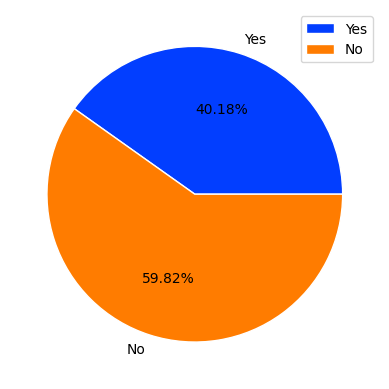

In [24]:
recommedYes = df[df["recommended"] == 1]
recommedNo = df[df["recommended"] == 0]

plt.pie(
    [len(recommedYes), len(recommedNo)],
    labels=["Yes", "No"],
    autopct='%.2f%%',
    colors=sns.color_palette("bright"),
    wedgeprops={"edgecolor": "white"},
)
plt.legend()
plt.show()

From the pie chart above, we know that 59.82% of passengers are dissatisfied with British Airways services. Let's breakdown the data to find what make passengers dissatisfied :

# View rating of BA service of passengers who are dissatisfied with British Airways

In [28]:
recommedNo.describe()

,seat_comfort,ground_service,value_for_money,cabin_staff_service,food_and_beverages,inflight_entertainment,wifi_and_connectivity,recommended
count,2159.000000,1884.000000,2278.000000,2146.000000,1914.000000,1490.000000,476.000000,2278.0
mean,2.121352,2.081741,1.713345,2.425909,1.829676,2.042953,1.457983,0.0
std,1.087933,1.210990,0.904732,1.285878,1.010265,1.143572,0.903979,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.0
75%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,1.250000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


# Analysis of food on airways

In [30]:
food=recommedNo[recommedNo['reviewBody'].str.contains("food | drink")]

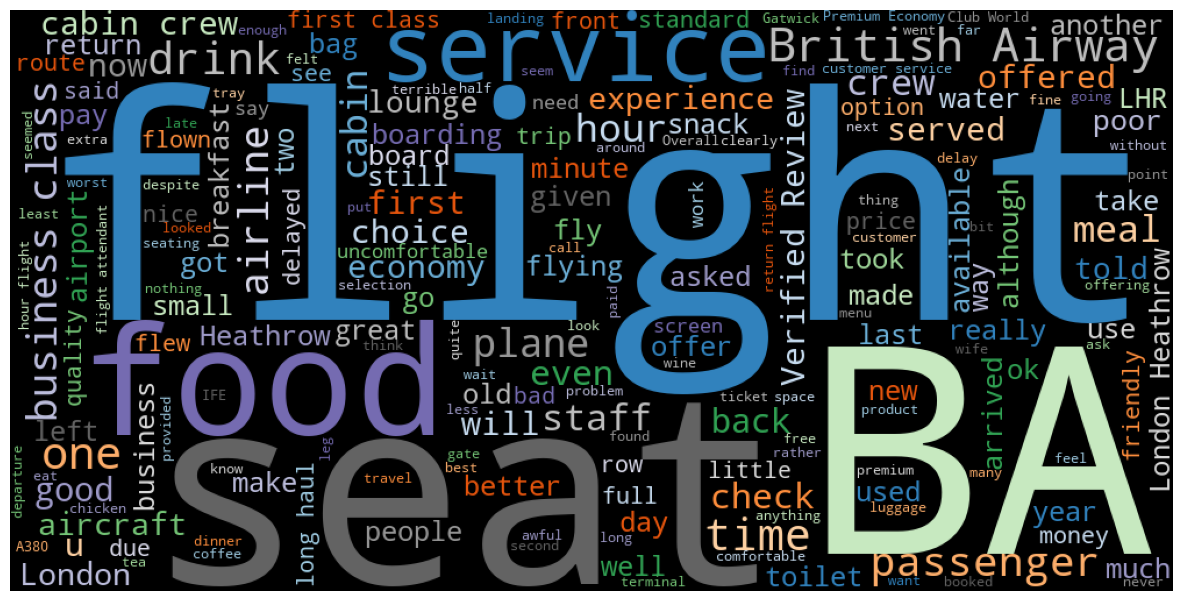

In [52]:
reviewWords=[]
for i in food['reviewBody']:
    a=i.split(" ")
    for x in a:
        reviewWords.append(x)

uniqueString=(" ").join(reviewWords)


wc=WordCloud(width=1000, height=500,colormap='tab20c').generate(uniqueString)
plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wc)
plt.show()

#### The analysis shows that:
-   The meals are served late.
-   The quality of the food is not upto the mark.

# Analysis for value of money

In [53]:
food=recommedNo[recommedNo['reviewBody'].str.contains("money | refund | value")]

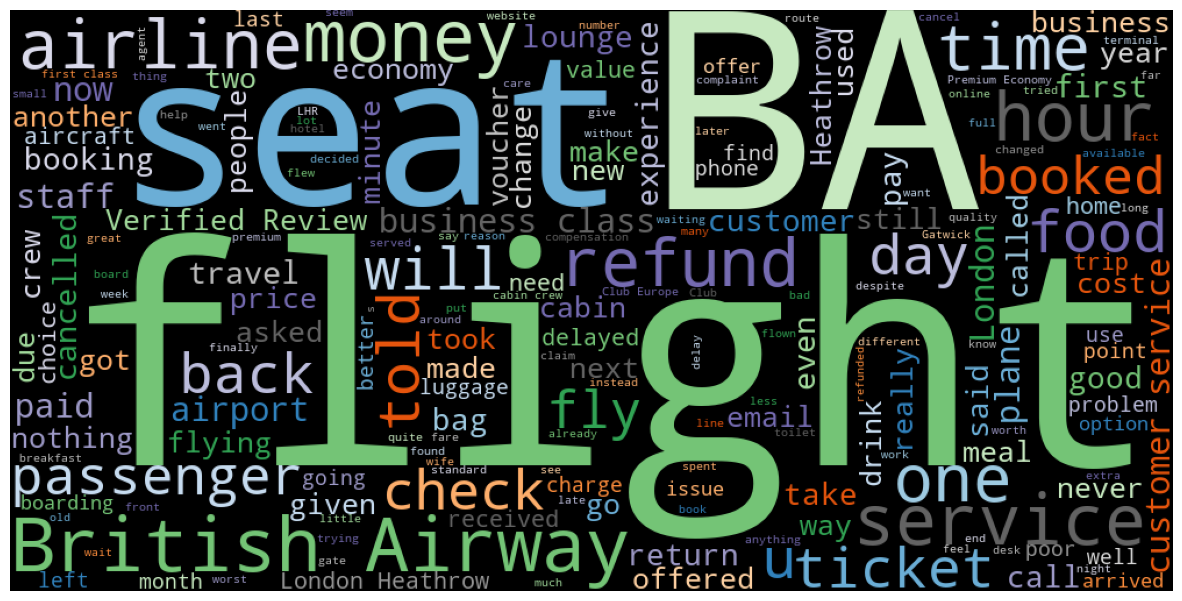

In [54]:
reviewWords=[]
for i in food['reviewBody']:
    a=i.split(" ")
    for x in a:
        reviewWords.append(x)

uniqueString=(" ").join(reviewWords)


wc=WordCloud(width=1000, height=500,colormap='tab20c').generate(uniqueString)
plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wc)
plt.show()

#### The analysis shows that:
-   There are frequent cases of flight getting delayed and problem in refund.
-   The customers are charged extra for th rebooking of canceled flights.